In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("AI_tools_cleaned_dataset.csv")

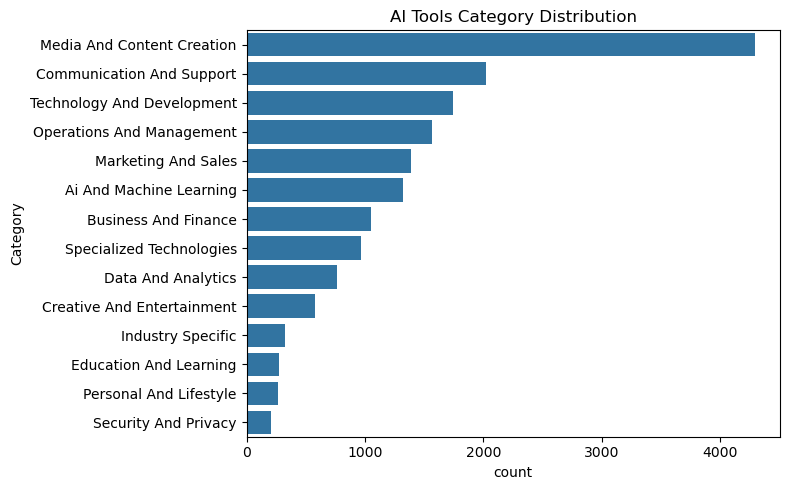

In [2]:
# Category Distribution

if 'Category' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index)
    plt.title("AI Tools Category Distribution")
    plt.tight_layout()
    plt.show()

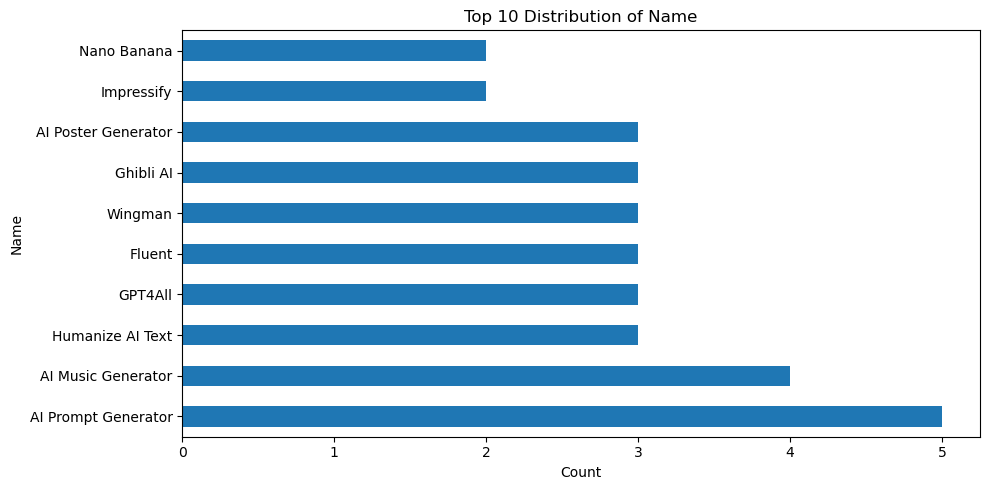

In [3]:
# Top 10 Most Frequent Values 

cat_cols = df.select_dtypes(include='object').columns

if len(cat_cols) > 0:
    col = cat_cols[0]
    plt.figure(figsize=(10,5))
    df[col].value_counts().head(10).plot(kind='barh')
    plt.title(f"Top 10 Distribution of {col}")
    plt.xlabel("Count")
    plt.tight_layout()
    plt.show()

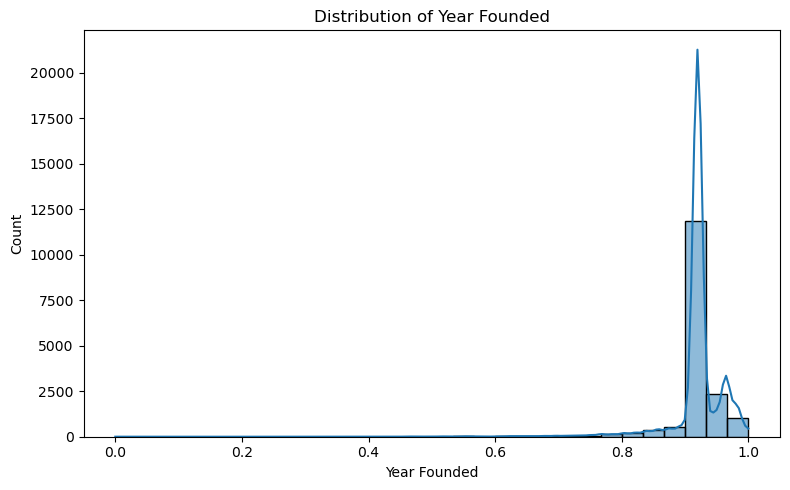

In [4]:
# Numerical Distribution

num_cols = df.select_dtypes(include=['int64','float64']).columns

if len(num_cols) > 0:
    col = num_cols[0]
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

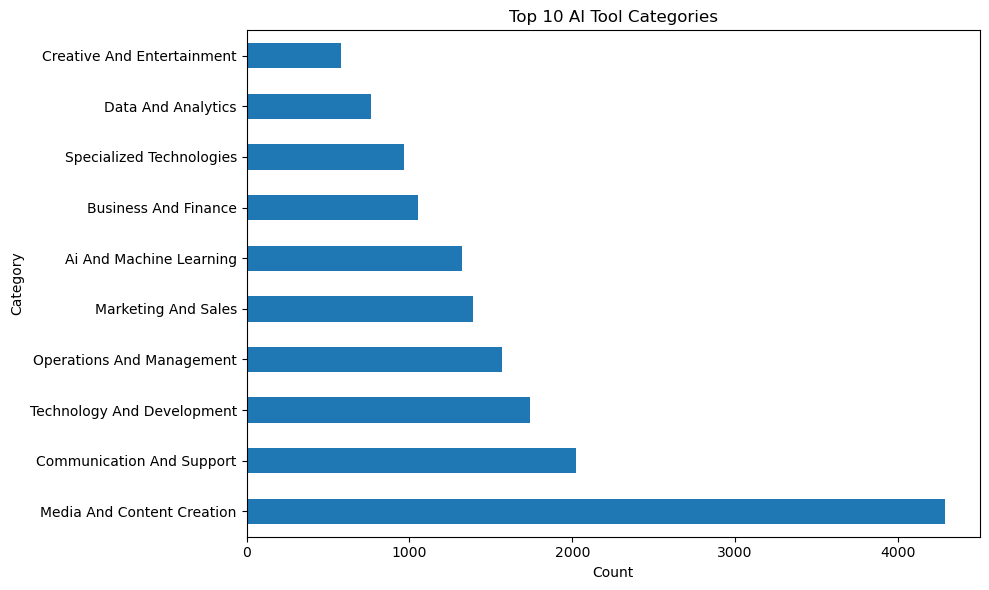

In [5]:
# Top 10 AI Tool Categories

plt.figure(figsize=(10,6))
df['Category'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 AI Tool Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

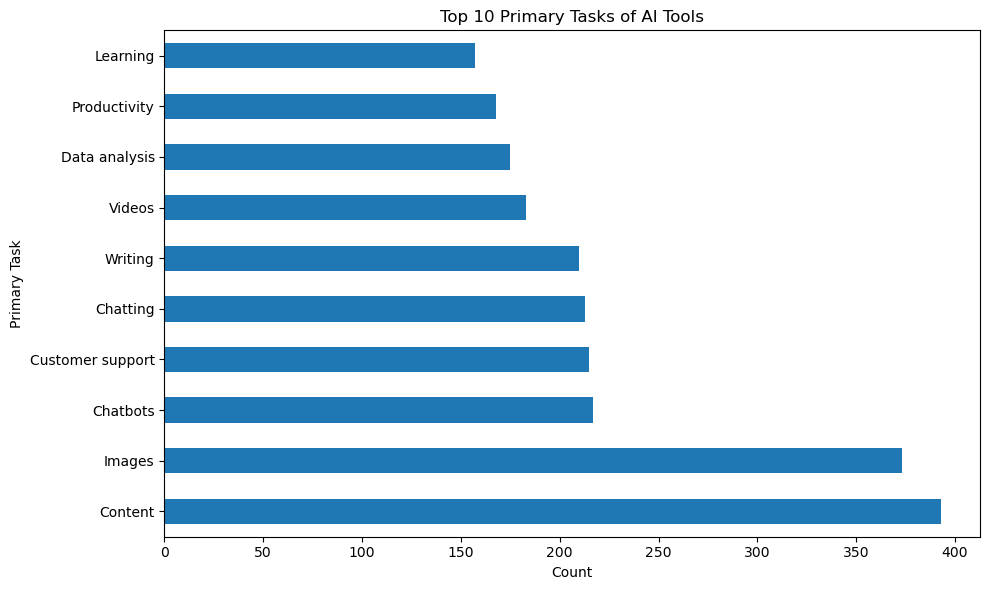

In [6]:
# Primary Task Distribution

plt.figure(figsize=(10,6))
df['Primary Task'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Primary Tasks of AI Tools")
plt.xlabel("Count")
plt.ylabel("Primary Task")
plt.tight_layout()
plt.show()

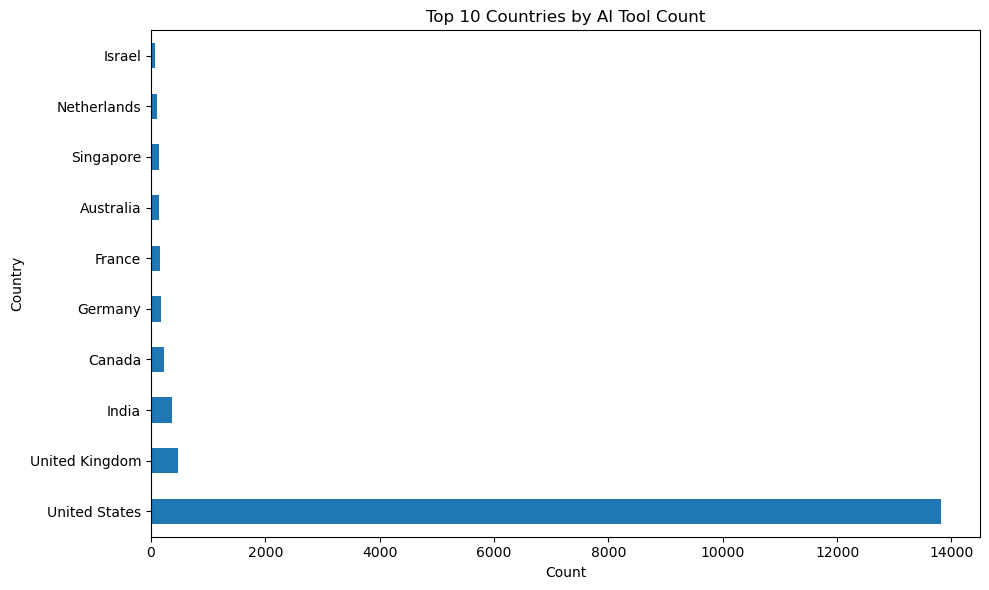

In [7]:
# Country-wise Distribution

plt.figure(figsize=(10,6))
df['Country'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Countries by AI Tool Count")
plt.xlabel("Count")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

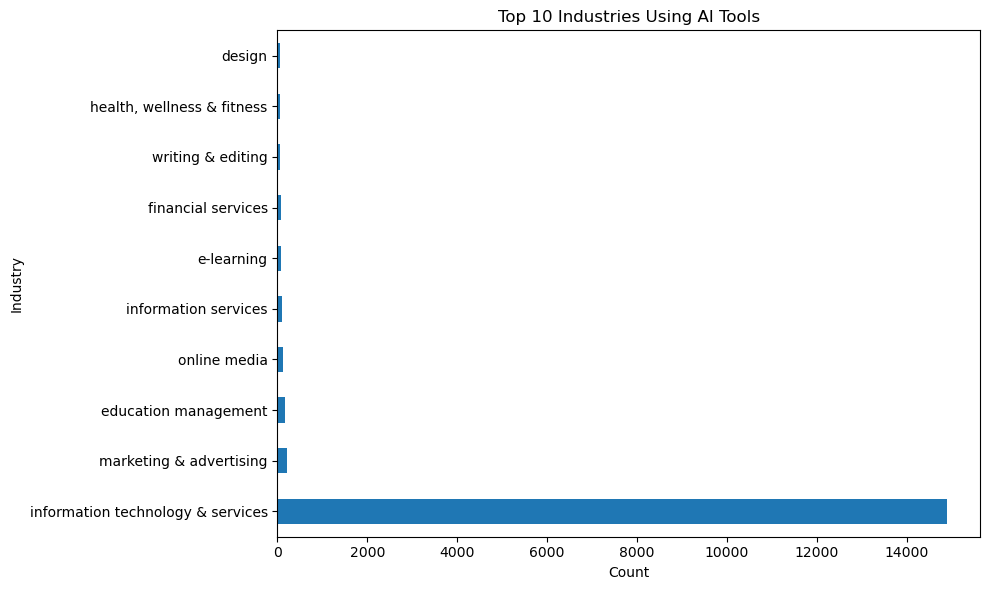

In [8]:
# Industry Distribution

plt.figure(figsize=(10,6))
df['industry'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Industries Using AI Tools")
plt.xlabel("Count")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

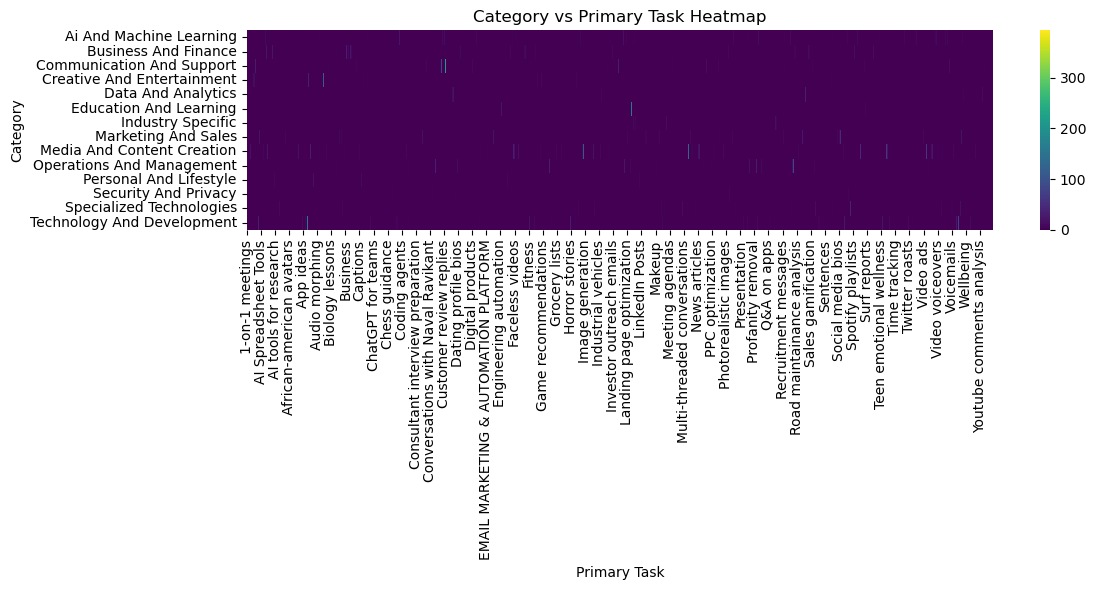

In [9]:
# Category vs Primary Task Heatmap
plt.figure(figsize=(12,6))
pivot = pd.crosstab(df['Category'], df['Primary Task'])
sns.heatmap(pivot, cmap='viridis')
plt.title("Category vs Primary Task Heatmap")
plt.xlabel("Primary Task")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

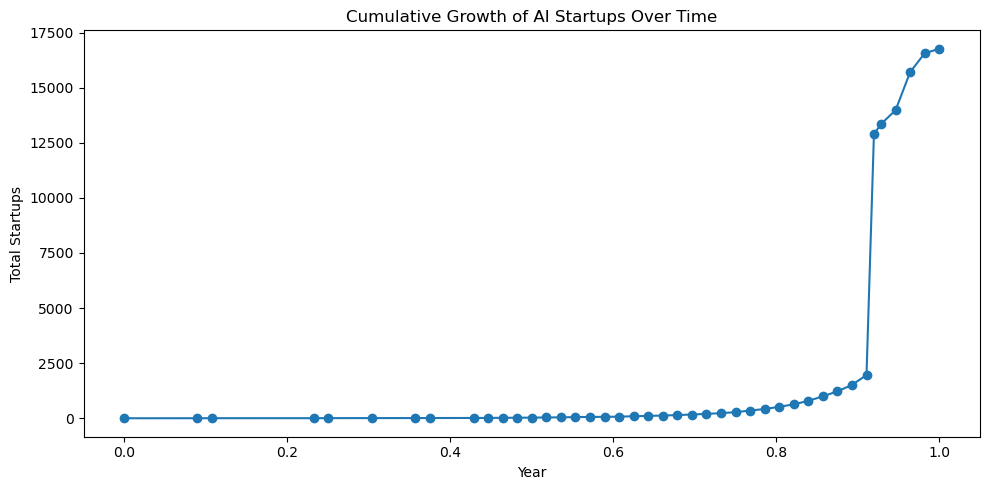

In [10]:
# AI Startup Growth Trend (Cumulative Growth)
plt.figure(figsize=(10,5))
df['Year Founded'].value_counts().sort_index().cumsum().plot(kind='line', marker='o')
plt.title("Cumulative Growth of AI Startups Over Time")
plt.xlabel("Year")
plt.ylabel("Total Startups")
plt.tight_layout()
plt.show()

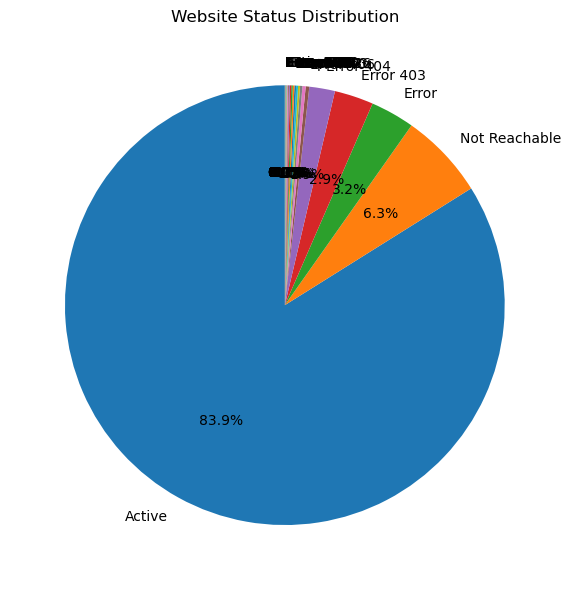

In [11]:
# Website Status Pie Chart
plt.figure(figsize=(6,6))
df['Website Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Website Status Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

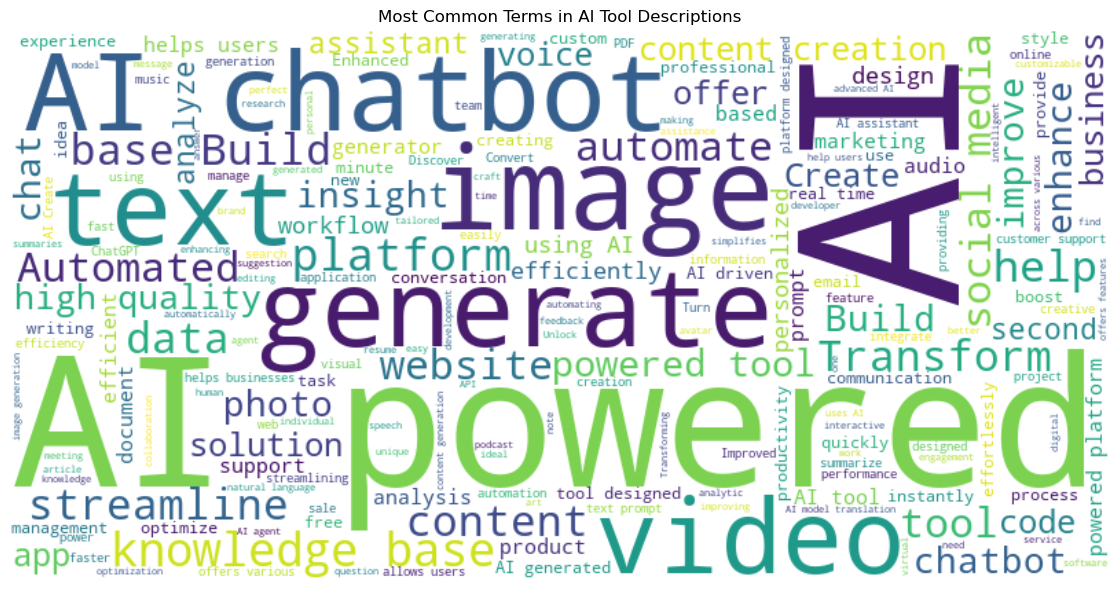

In [12]:
# WordCloud of AI Tool Descriptions 
from wordcloud import WordCloud

text = " ".join(df['Short Description'].dropna())

wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Terms in AI Tool Descriptions")
plt.tight_layout()
plt.show()

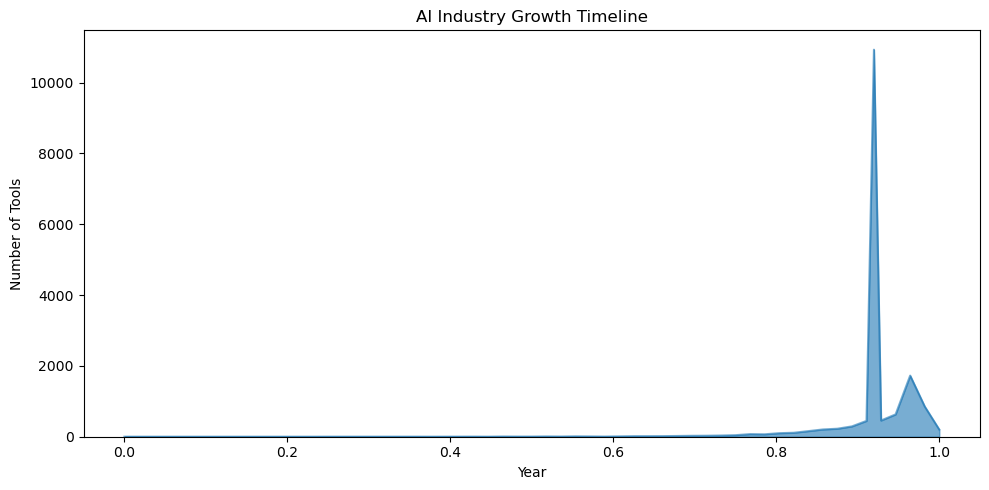

In [13]:
# AI Industry Timeline (Area Chart)
year_trend = df['Year Founded'].value_counts().sort_index()

plt.figure(figsize=(10,5))
year_trend.plot(kind='area', alpha=0.6)
plt.title("AI Industry Growth Timeline")
plt.xlabel("Year")
plt.ylabel("Number of Tools")
plt.tight_layout()
plt.show()

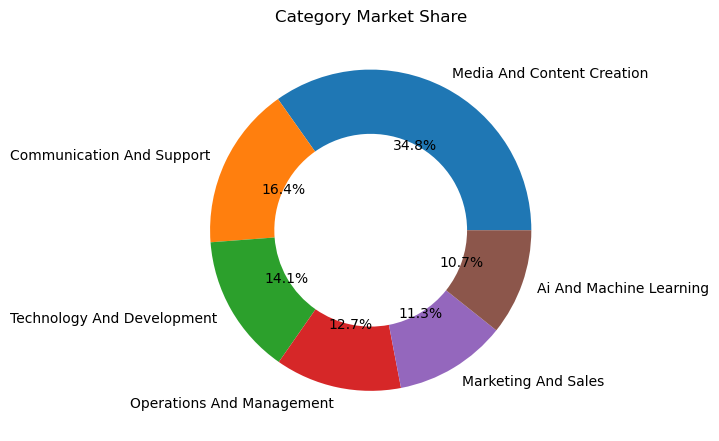

In [14]:
# Category Market Share (Donut Chart)
category_counts = df['Category'].value_counts().head(6)

plt.figure(figsize=(7,7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
        wedgeprops=dict(width=0.4))
plt.title("Category Market Share")
plt.tight_layout()
plt.show()

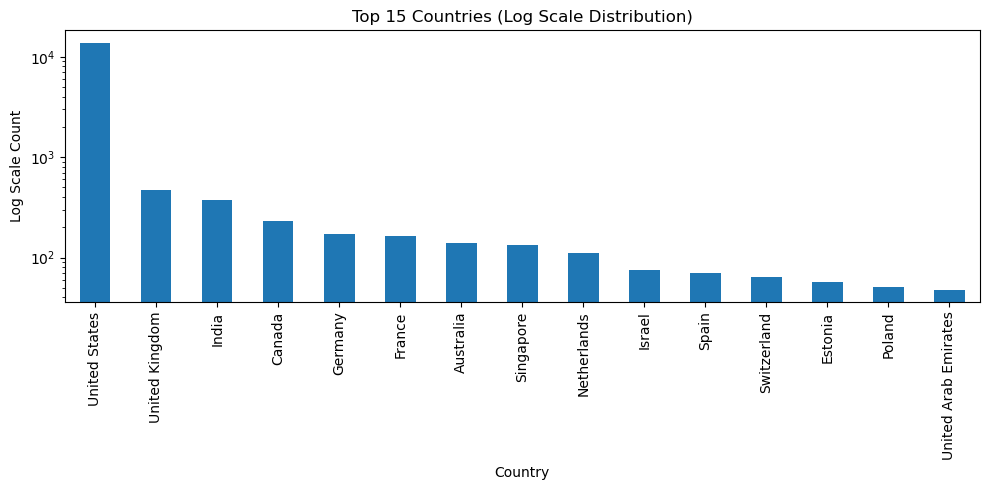

In [15]:
# Global AI Tool Distribution (Country Bar + Log Scale)
plt.figure(figsize=(10,5))
df['Country'].value_counts().head(15).plot(kind='bar')
plt.yscale('log')
plt.title("Top 15 Countries (Log Scale Distribution)")
plt.ylabel("Log Scale Count")
plt.tight_layout()
plt.show()

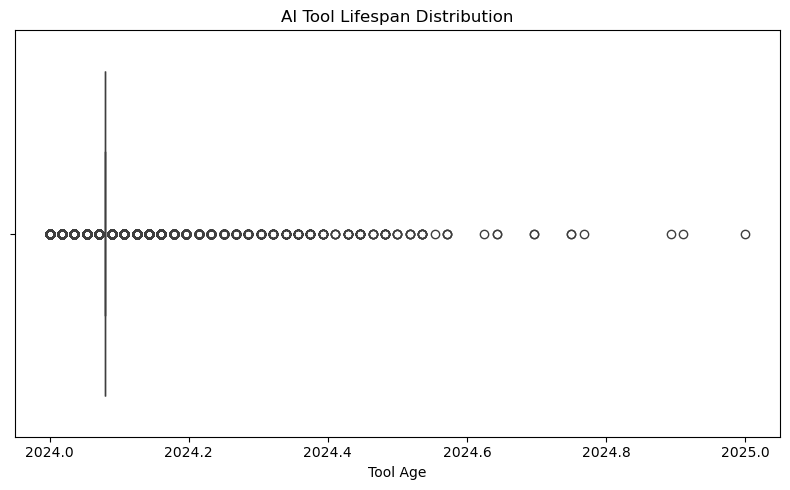

In [16]:
# AI Tool Lifespan Analysis (Box Plot)
current_year = 2025
df['Tool Age'] = current_year - df['Year Founded']

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Tool Age'])
plt.title("AI Tool Lifespan Distribution")
plt.tight_layout()
plt.show()

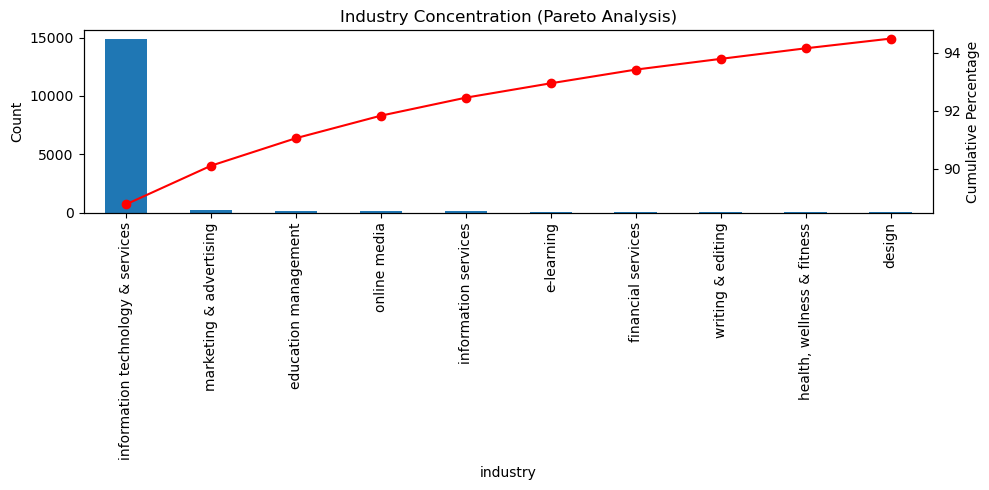

In [17]:
# Industry Concentration (Pareto Chart)
industry_counts = df['industry'].value_counts()

cum_percent = industry_counts.cumsum() / industry_counts.sum() * 100

fig, ax1 = plt.subplots(figsize=(10,5))

industry_counts.head(10).plot(kind='bar', ax=ax1)
ax1.set_ylabel("Count")

ax2 = ax1.twinx()
cum_percent.head(10).plot(color='red', marker='o', ax=ax2)
ax2.set_ylabel("Cumulative Percentage")

plt.title("Industry Concentration (Pareto Analysis)")
plt.tight_layout()
plt.show()

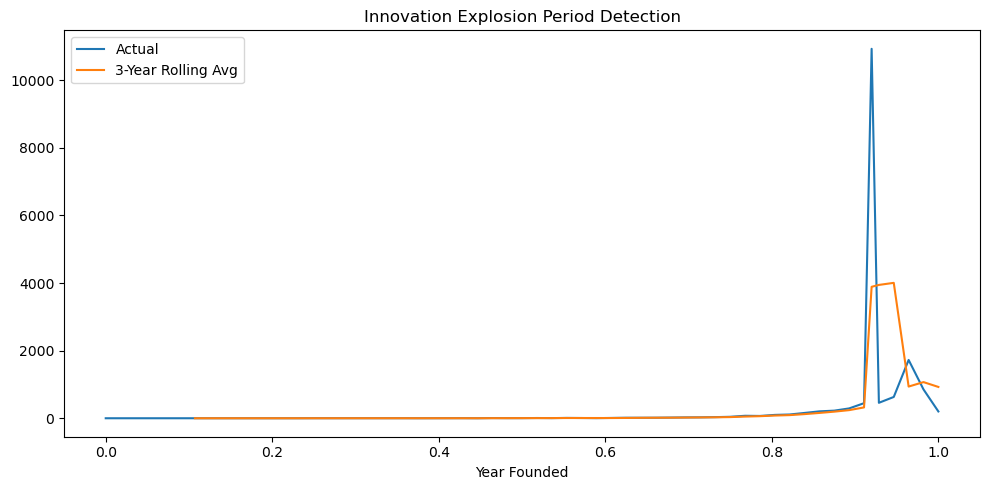

In [18]:
# Innovation Explosion Period Detection (Rolling Mean)
trend = df['Year Founded'].value_counts().sort_index()

rolling = trend.rolling(window=3).mean()

plt.figure(figsize=(10,5))
trend.plot(label='Actual')
rolling.plot(label='3-Year Rolling Avg')
plt.legend()
plt.title("Innovation Explosion Period Detection")
plt.tight_layout()
plt.show()

C:\Users\user1\AppData\Local\Temp\ipykernel_18372\2307328657.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


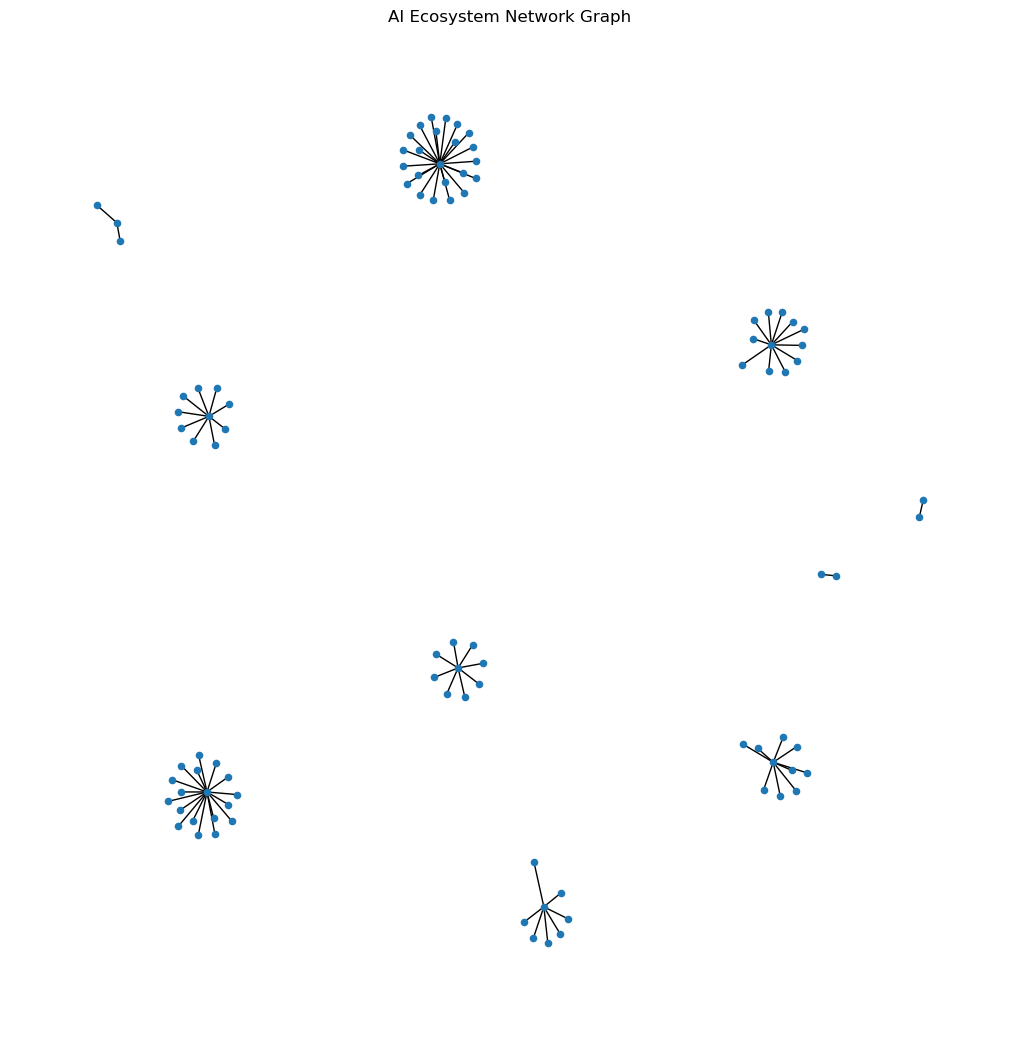

In [19]:
# AI Ecosystem Network 
import networkx as nx

edges = list(zip(df['Category'], df['Primary Task']))

G = nx.Graph()
G.add_edges_from(edges[:100])

plt.figure(figsize=(10,10))
nx.draw(G, node_size=20, with_labels=False)
plt.title("AI Ecosystem Network Graph")
plt.tight_layout()
plt.show()